# Aprates


In [1]:
#source /export/ciaot/bin/ciao.bash -o
ciaover -v
PFILES="./param;$ASCDS_INSTALL/param:$ASCDS_INSTALL/contrib/param"
mkdir -p ./param
ASCDS_WORK_PATH=./

# packages in environment at /export/miniconda/envs/ciao:
#
# Name                    Version                   Build  Channel
ciao                      4.13.0           py38h5ec60c1_0    https://cxc.cfa.harvard.edu/conda/ciao
ciao-contrib              4.13.2                     py_0    https://cxc.cfa.harvard.edu/conda/ciao
ds9                       8.2                           2    https://cxc.cfa.harvard.edu/conda/ciao
sherpa                    4.13.0           py38h5ec60c1_0    https://cxc.cfa.harvard.edu/conda/ciao
zciao                     4.13.0                        0    https://hea-www.harvard.edu/~kjg/ciao

System information:
Linux lenin.cfa.harvard.edu 3.10.0-1062.12.1.el7.x86_64 #1 SMP Tue Feb 4 23:02:59 UTC 2020 x86_64 x86_64 x86_64 GNU/Linux


In [2]:
/bin/rm -rf CXOJ004235.0+404839/
search_csc "CXO J004235.0+404839" out=src.tsv \
  filetype="regevt,regexp,reg,psf" download=all \
  radius=1 radunit=arcsec band=broad  clob+ cat=csc1

cp -fv CXOJ004235.0+404839/00313_000/r0001/acisf00313_000N001_r0001* ./
gunzip -f acisf00313_000N001_r0001* || echo

search_csc
             pos = CXO J004235.0+404839
          radius = 1
         outfile = src.tsv
         radunit = arcsec
         columns = INDEF
     sensitivity = no
        download = all
            root = ./
           bands = broad
       filetypes = regevt,regexp,reg,psf
         catalog = csc1
         verbose = 1
         clobber = yes
            mode = ql


11 rows returned by query
1 Different Master Source(s).
11 Different Observation(s).

name                	ra          	dec         	sepn	obsid	
CXO J004235.0+404839	 10.64581   	 40.81091   	0"	 2902	
CXO J004235.0+404839	 10.64581   	 40.81091   	0"	 4536	
CXO J004235.0+404839	 10.64581   	 40.81091   	0"	 5690	
CXO J004235.0+404839	 10.64581   	 40.81091   	0"	  313	
CXO J004235.0+404839	 10.64581   	 40.81091   	0"	  314	
CXO J004235.0+404839	 10.64581   	 40.81091   	0"	 1580	
CXO J004235.0+404839	 10.64581   	 40.81091   	0"	 1584	
CXO J004235.0+404839	 10.64581   	 40.81091   	0"	  263	
CXO J004235.0+404839	 10

In [3]:
/bin/rm -rf 313/
download_chandra_obsid 313 asol,pbk  
/bin/ls -l 313/*/*gz


r4_header_update acisf00313_000N001_r0001_regevt3.fits pbk=313/secondary/acisf085946812N004_pbk0.fits.gz as=313/primary/pcadf00313_000N001_asol1.fits.gz


  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  asol     fits        2 Mb  ####################          < 1 s  19179.3 kb/s
  pbk      fits        4 Kb  ####################          < 1 s  321.5 kb/s

      Total download size for ObsId 313 = 2 Mb
      Total download time for ObsId 313 = < 1 s

-rw-rw-r-- 1 kjg sds 1582717 Oct 14 09:01 313/primary/pcadf00313_000N001_asol1.fits.gz
-rw-rw-r-- 1 kjg sds    4021 Oct 14 09:01 313/secondary/acisf085946812N004_pbk0.fits.gz
Missing keywords 'OCLKPAIR,ORC_MODE,SUM_2X2,FEP_CCD' from event file 'acisf00313_000N001_r0001_regevt3.fits' header.
Missing keywords 'DY_AVG,DZ_AVG,DTH_AVG' from event file 'acisf00313_000N001_r0001_regevt3.fits' header.


In [4]:
dmlist acisf00313_000N001_r0001_reg3.fits blocks

 
--------------------------------------------------------------------------------
Dataset: acisf00313_000N001_r0001_reg3.fits
--------------------------------------------------------------------------------
 
     Block Name                          Type         Dimensions
--------------------------------------------------------------------------------
Block    1: PRIMARY                        Null        
Block    2: SRCREG                         Table         5 cols x 1        rows
Block    3: BKGREG                         Table         5 cols x 2        rows


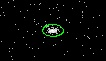

In [5]:
dmimg2jpg "acisf00313_000N001_r0001_regevt3.fits[bin sky=1]" outfile=src.jpg \
  regionfile="region(acisf00313_000N001_r0001_reg3.fits[srcreg])" \
  mode=h clob+

display < src.jpg

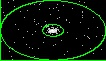

In [6]:
dmimg2jpg "acisf00313_000N001_r0001_regevt3.fits[bin sky=1]" outfile=bkg.jpg \
  regionfile="region(acisf00313_000N001_r0001_reg3.fits[bkgreg])" \
  mode=h clob+

display < bkg.jpg

## Net Source Counts

### Counts in src and bkg apertures

In [7]:
dmextract \
       "acisf00313_000N001_r0001_regevt3.fits[energy=500:7000][bin sky=region(acisf00313_000N001_r0001_reg3.fits)]" \
       outfile=- opt=generic\
       bkg="acisf00313_000N001_r0001_regevt3.fits[energy=500:7000][bin sky=region(acisf00313_000N001_r0001_reg3.fits[bkgreg])]" |\
       dmlist -"[col counts, area,bg_counts,bg_area]" data,clean

#  COUNTS               AREA                 BG_COUNTS            BG_AREA
                141.0       196.6885315328                  9.0              4720.50


### PSF Fractions in src and bkg regions


In [8]:
dmstat acisf00313_000N001_r0001b_psf3.fits"[sky=region(acisf00313_000N001_r0001_reg3.fits)]" \
      centroid=no verbose=0

pget dmstat out_sum

0.95296573744


In [9]:
dmstat acisf00313_000N001_r0001b_psf3.fits"[sky=region(acisf00313_000N001_r0001_reg3.fits[bkgreg])]" \
      centroid=no verbose=0

pget dmstat out_sum

0.028613533096


### Run aprates

In [10]:
punlearn aprates
pset aprates conf=0.90
pset aprates n=141 m=9
pset aprates A_s=196.689 A_b=4720.50
pset aprates alpha=0.953 beta=0.029
pset aprates T_s=1 E_s=1 eng_s=1 flux_s=1 T_b=1 E_b=1 eng_b=1 flux_b=1 
pset aprates outfile=aprates_netcts.par

aprates mode=h clob+

# aprates (CIAO 4.13): WARNING: Large number of counts, just using Gaussian pdf



In [11]:
pget aprates_netcts.par src_cnts src_cnts_err_lo src_cnts_err_up

147.748
127.286
168.334


## Net Count Rate

In [12]:
dmkeypar acisf00313_000N001_r0001_regevt3.fits LIVETIME echo+

5977.7355472452


In [13]:
pset aprates T_s=5977.74 T_b=5977.74
pset aprates outfile=aprates_netrate.par

aprates mode=h clob+

# aprates (CIAO 4.13): WARNING: Large number of counts, just using Gaussian pdf



In [14]:
pget aprates_netrate.par src_rate src_rate_err_lo src_rate_err_up

0.0247163
0.0212934
0.0281601


## Net Photon Flux

In [15]:
dmstat acisf00313_000N001_r0001b_regexp3.fits"[sky=region(acisf00313_000N001_r0001_reg3.fits)]" \
      centroid=no verbose=0

pget dmstat out_mean

2308338.2013


In [16]:
dmstat acisf00313_000N001_r0001b_regexp3.fits"[sky=region(acisf00313_000N001_r0001_reg3.fits[bkgreg])]" \
      centroid=no verbose=0

pget dmstat out_mean

2058975.0111


In [17]:
pset aprates E_s=2308338.2013 E_b=2058975.0111
pset aprates outfile=aprates_netflux.par
aprates mode=h clob+

# aprates (CIAO 4.13): WARNING: Large number of counts, just using Gaussian pdf



In [18]:
pget aprates_netflux.par photflux_aper photflux_aper_err_lo photflux_aper_err_up

6.398540000000001e-05
5.51211e-05
7.29037e-05


## Net Energy flux

Using mean energy of events

In [19]:
dmtcalc "acisf00313_000N001_r0001_regevt3.fits[energy=500:7000,sky=region(acisf00313_000N001_r0001_reg3.fits)]" \
      - expression="energy=1.6e-12*energy" | dmstat "-[cols energy]" verbose=0

pget dmstat out_mean

2.5579239786e-09


In [20]:
dmtcalc "acisf00313_000N001_r0001_regevt3.fits[energy=500:7000,sky=region(acisf00313_000N001_r0001_reg3.fits[bkgreg])]" \
      - expression="energy=1.6e-12*energy" | dmstat "-[cols energy]" verbose=0

pget dmstat out_mean

4.2743555979e-09


In [21]:
pset aprates eng_s=2.56e-09 eng_b=4.27e-09
pset aprates outfile=aprates_flux.par

aprates mode=h clob+

# aprates (CIAO 4.13): WARNING: Large number of counts, just using Gaussian pdf



In [22]:
pget aprates_flux.par flux_aper flux_aper_err_lo flux_aper_err_up

1.63475e-13
1.4078e-13
1.86309e-13


## From mean event flux

In [23]:
eff2evt "acisf00313_000N001_r0001_regevt3.fits[energy=500:7000][sky=region(acisf00313_000N001_r0001_reg3.fits)]" - | \
      dmstat -"[cols flux]" verbose=0

pget dmstat out_mean

9.8694387382e-16


In [24]:
eff2evt "acisf00313_000N001_r0001_regevt3.fits[energy=500:7000][sky=region(acisf00313_000N001_r0001_reg3.fits[bkgreg])]" - | \
      dmstat -"[cols flux]" verbose=0
pget dmstat out_mean

2.2453168777e-15


In [25]:
pset aprates flux_s=9.76e-16 flux_b=2.23e-15
pset aprates outfile=aprates_eflux.par
aprates mode=h clob+

# aprates (CIAO 4.13): WARNING: Large number of counts, just using Gaussian pdf



In [26]:
pget aprates_eflux.par eflux_aper eflux_aper_err_lo eflux_aper_err_up

1.43708e-13
1.23733e-13
1.63804e-13


# Cleanup

In [27]:
/bin/rm -rf CXOJ004235.0+404839/
/bin/rm -rf 313
